<a href="https://colab.research.google.com/github/srilav/neuralnetwork/blob/main/M4_MP5_NB_Stock_Trading_using_DRL_lalitha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini Project: Stock Trading using DRL

## Learning Objectives

At the end of the experiment, you will be able to

* perform stock trading using Deep Reinforcement Learning
* build an environment for agent and perform stock trading
* experiment with SAC model and improve the reward
* create a dashboard for stock trading using `jupyter-dash`

## Information

Deep reinforcement learning combines artificial neural networks with a framework of reinforcement learning that helps software agents learn how to reach their goals. That is, it unites function approximation and target optimization, mapping states and actions to the rewards they lead to.

Reinforcement learning refers to goal-oriented algorithms, which learn how to achieve a complex objective (goal) or how to maximize along a particular dimension over many steps; for example, they can maximize the points won in a game over many moves. Reinforcement learning algorithms can start from a blank slate, and under the right conditions, achieve superhuman performance. Like a pet incentivized by scolding and treats, these algorithms are penalized when they make the wrong decisions and rewarded when they make the right ones – this is reinforcement.

![img](https://miro.medium.com/max/974/0*NgZ_bq_nUOq73jK_.png)

**SAC:** Soft Actor Critic is defined for RL tasks involving continuous actions. The biggest feature of SAC is that it uses a modified RL objective function. Instead of only seeking to maximize the lifetime rewards, SAC seeks to also maximize the entropy of the policy. The term ‘entropy’ has a rather esoteric definition and many interpretations depending on the application

![img](https://miro.medium.com/max/353/0*5Y3SzMyOQZBRUhrh.png)

Fig: Actor-Critic architecture. Source: Medium

Learning of the actor is based policy gradient approach and critic is learned in value-based fashion. In SAC, there are three networks: the first network represents state-value(V) parameterised by ψ, the second one is a policy function that parameterised by ϕ, and the last one represents soft q function parameterised by θ.

Read More about SAC [here](https://arxiv.org/abs/1801.01290)

## Dataset

### Dataset Description

The Dataset chosen for this mini project is NIFTY50 Stock tradings. The data is the price history and trading volumes of the fifty stocks in the index NIFTY 50 from NSE (National Stock Exchange) India. All stocks are at a day-level with pricing and trading values split across. The NIFTY 50 is a diversified 50 stock index accounting for 13 sectors of the economy.

See the stock indexes of NIFTY 50 in the following [link](https://www1.nseindia.com/products/content/equities/indices/nifty_50.htm)

**Note:** Choose the NIFTY 50 ticker symbols and download the stock data from '2009-01-01' to '2021-09-01' using YahooDownloader

## Grading = 10 Points

In [2]:
#@title Install FinRL, other necessary libraries and extensions
!pip -qq install git+https://github.com/AI4Finance-LLC/FinRL-Library.git

!pip install -q jupyter-dash==0.3.0rc1 dash-bootstrap-components

!pip install pyyaml==5.4.1

!pip install macrodemos --upgrade
!pip install -q dash==2.0.0

     |████████████████████████████████| 234 kB 8.5 MB/s 
     |████████████████████████████████| 177 kB 67.2 MB/s 
     |████████████████████████████████| 53.2 MB 179 kB/s 
     |████████████████████████████████| 1.2 MB 48.2 MB/s 
     |████████████████████████████████| 125 kB 74.9 MB/s 
     |████████████████████████████████| 150 kB 57.8 MB/s 
     |████████████████████████████████| 2.6 MB 48.5 MB/s 
     |████████████████████████████████| 153 kB 67.9 MB/s 
     |████████████████████████████████| 952 kB 59.5 MB/s 
     |████████████████████████████████| 197 kB 71.8 MB/s 
     |████████████████████████████████| 91.7 MB 121 kB/s 
     |████████████████████████████████| 448 kB 76.3 MB/s 
     |████████████████████████████████| 52 kB 1.8 MB/s 
     |████████████████████████████████| 271 kB 63.7 MB/s 
     |████████████████████████████████| 3.6 MB 52.0 MB/s 
     |████████████████████████████████| 2.6 MB 40.4 MB/s 
     |████████████████████████████████| 2.6 MB 56.2 MB/s 
     |███████████

In [2]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/nifty50list.csv

!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/df_account_value.csv

### Import required packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('Agg')
import warnings
warnings.filterwarnings("ignore")
import datetime
import os
from finrl import config
from finrl.finrl_meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.finrl_meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.finrl_meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
import sys
sys.path.append("../FinRL-Library")

### Data Loading (1 point)

* Read the ticker symbols of Nifty 50 and add `.NS` extension

* Using the symbols download the stock prices data using YahooDownloader

Hint: [YahooDownloader](https://gist.githubusercontent.com/BruceYanghy/6c37022257cfe765d551c1b173570bd4/raw/b2c69214c6316ff8fa46d9b14d437ec6a1edeef2/DownloadData.py)

In [4]:
path = "/content/nifty50list.csv"
# YOUR CODE HERE

In [5]:
DOW_50_TICKER = pd.read_csv(path)

In [6]:
DOW_50_TICKER.head()

,Company Name,Industry,Symbol,Series,ISIN Code
0,ACC Ltd.,CEMENT & CEMENT PRODUCTS,ACC,EQ,INE012A01025
1,Abbott India Ltd.,PHARMA,ABBOTINDIA,EQ,INE358A01014
2,Adani Enterprises Ltd.,METALS,ADANIENT,EQ,INE423A01024
3,Adani Green Energy Ltd.,POWER,ADANIGREEN,EQ,INE364U01010
4,Adani Transmission Ltd.,POWER,ADANITRANS,EQ,INE931S01010


In [7]:
DOW_50_TICKER.Symbol

0            ACC
1     ABBOTINDIA
2       ADANIENT
3     ADANIGREEN
4     ADANITRANS
5          ALKEM
6      AMBUJACEM
7     APOLLOHOSP
8     AUROPHARMA
9          DMART
10    BAJAJHLDNG
11    BANDHANBNK
12    BERGEPAINT
13        BIOCON
14      BOSCHLTD
15      CADILAHC
16        COLPAL
17           DLF
18         DABUR
19          GAIL
20         GLAND
21      GODREJCP
22       HDFCAMC
23       HAVELLS
24     HINDPETRO
25       ICICIGI
26    ICICIPRULI
27           IGL
28    INDUSTOWER
29        NAUKRI
30        INDIGO
31      JUBLFOOD
32           LTI
33         LUPIN
34           MRF
35        MARICO
36    MUTHOOTFIN
37          NMDC
38      PETRONET
39    PIDILITIND
40           PEL
41          PGHH
42           PNB
43       SBICARD
44       SIEMENS
45    TORNTPHARM
46           UBL
47    MCDOWELL-N
48          VEDL
49       YESBANK
Name: Symbol, dtype: object

In [8]:
""" Download and save the data in a pandas DataFrame """

start_date = '2009-01-01'
end_date = '2021-09-01'
# Download and save the data in a pandas DataFrame:
df = YahooDownloader(start_date,
                     end_date,
                     ticker_list = DOW_50_TICKER.Symbol).fetch_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ABBOTINDIA: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ADANIENT: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ADANIGREEN: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ADANITRANS: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ALKEM: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AMBUJACEM: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AP

In [9]:
df.head()

,date,open,high,low,close,volume,tic,day
0,2009-01-02,20.570000,20.760000,19.520000,11.407828,763300.0,ACC,4
1,2009-01-02,20.480000,20.980000,20.299999,20.740000,888830.0,IGL,4
2,2009-01-02,104.230003,108.129997,104.230003,106.400002,2973855.0,PNB,4
3,2009-01-02,31.881800,33.472698,30.290899,31.590900,11970970.0,UBL,4
4,2009-01-05,19.770000,19.770000,18.660000,11.186768,1191100.0,ACC,0


### Preprocess Data (1 point)

FinRL uses a `FeatureEngineer` class to preprocess data. Some of the technical indicators to be used in the analysis of financial markets includes.

1. `relative strength index` (RSI): it represents the size of recent gains and losses, during a specified time period.
2. `moving average convergence divergence` (MACD):  it is an indicator to determine price momentum and short term trend.
3. `commodity channel index` (CCI): its an indicator helps in identifying cyclical trends.
4. `directional index` (DX): it represents group of directional movements that form trading system

* Configure the technical indicators and apply feature engineering

  Hint: `FeatureEngineer()`

In [10]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')

In [11]:
df.sort_values(['date','tic'],ignore_index=True).head()

,date,open,high,low,close,volume,tic,day
0,2009-01-02,20.570000,20.760000,19.520000,11.407828,763300.0,ACC,4
1,2009-01-02,20.480000,20.980000,20.299999,20.740000,888830.0,IGL,4
2,2009-01-02,104.230003,108.129997,104.230003,106.400002,2973855.0,PNB,4
3,2009-01-02,31.881800,33.472698,30.290899,31.590900,11970970.0,UBL,4
4,2009-01-05,19.770000,19.770000,18.660000,11.186768,1191100.0,ACC,0


In [12]:
tech_indicator_list = config.INDICATORS
print(tech_indicator_list)

['macd', 'boll_ub', 'boll_lb', 'rsi_30', 'cci_30', 'dx_30', 'close_30_sma', 'close_60_sma']


In [13]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = tech_indicator_list,
                    use_turbulence=False,
                    user_defined_feature = False)

df = fe.preprocess_data(df)
df.head()

Successfully added technical indicators


,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma
0,2009-01-02,20.570000,20.760000,19.520000,11.407828,763300.0,ACC,4,0.000000,11.609925,10.984671,0.000000,-66.666667,100.000000,11.407828,11.407828
1,2009-01-05,19.770000,19.770000,18.660000,11.186768,1191100.0,ACC,0,-0.004960,11.609925,10.984671,0.000000,-66.666667,100.000000,11.297298,11.297298
2,2009-01-06,19.370001,20.620001,19.230000,11.966291,950600.0,ACC,1,0.017853,12.323791,10.716801,78.484833,54.512126,2.749061,11.520296,11.520296
3,2009-01-07,20.340000,21.000000,20.030001,11.867400,699700.0,ACC,2,0.024221,12.349288,10.864856,71.155783,98.373778,21.918990,11.607072,11.607072
4,2009-01-08,20.370001,20.910000,19.930000,12.041922,1070300.0,ACC,3,0.034116,12.445333,10.942751,75.356955,81.422119,15.513642,11.694042,11.694042


In [14]:
""" Perform Feature Engineering """
df1 = FeatureEngineer(use_technical_indicator=True, use_turbulence=False).preprocess_data(df.copy())


# add covariance matrix as states
df1=df1.sort_values(['date','tic'],ignore_index=True)
df1.index = df1.date.factorize()[0]

cov_list = []
# look back is one year
lookback=252
for i in range(lookback,len(df1.index.unique())):
  data_lookback = df1.loc[i-lookback:i,:]
  price_lookback=data_lookback.pivot_table(index = 'date',columns = 'tic', values = 'close')
  return_lookback = price_lookback.pct_change().dropna()
  covs = return_lookback.cov().values 
  cov_list.append(covs)
  
df_cov = pd.DataFrame({'date':df1.date.unique()[lookback:],'cov_list':cov_list})
df1 = df1.merge(df_cov, on='date')
df1 = df1.sort_values(['date','tic']).reset_index(drop=True)
df1.head()

Successfully added technical indicators


,date,open,high,low,close,volume,tic,day,macd_x,boll_ub_x,...,close_60_sma_x,macd_y,boll_ub_y,boll_lb_y,rsi_30_y,cci_30_y,dx_30_y,close_30_sma_y,close_60_sma_y,cov_list
0,2010-01-04,28.389999,28.770000,27.100000,16.887306,628900.0,ACC,0,0.194004,17.939628,...,16.667815,0.194004,17.939628,16.249297,51.571503,37.393500,3.214785,16.939092,16.667815,[[0.00158589221732719]]
1,2010-01-05,27.360001,27.440001,26.760000,16.616022,861400.0,ACC,1,0.128163,17.948084,...,16.676236,0.128163,17.948084,16.220495,49.640916,-47.587332,4.697722,16.929433,16.676236,[[0.001585362349719525]]
2,2010-01-06,26.930000,27.090000,26.150000,16.307751,1621800.0,ACC,2,0.050526,17.949778,...,16.672719,0.050526,17.949778,16.217568,47.548498,-96.728819,16.913411,16.911759,16.672719,[[0.0015689200580357669]]
3,2010-01-07,26.469999,26.950001,26.299999,16.579029,476400.0,ACC,3,0.010763,17.930756,...,16.671592,0.010763,17.930756,16.255704,49.486789,-78.901895,16.913411,16.900866,16.671592,[[0.001569343136702495]]
4,2010-01-08,26.730000,26.820000,26.360001,16.424887,253500.0,ACC,4,-0.032808,17.935574,...,16.673681,-0.032808,17.935574,16.246570,48.434711,-85.174051,16.913411,16.899428,16.673681,[[0.0015692189013792384]]


### Exploratory Data Analysis (2 points)

#### Describe the statistics of the data

In [15]:
# YOUR CODE HERE

#### Find how many times did the stock prices end lower than their opening prices in 2019 vs in 2020?

**Hint:** Open - Close per day

In [16]:
# YOUR CODE HERE

#### Find the stock that shows the highest increase in stock price per day, over the entire time period

In [17]:
# YOUR CODE HERE

#### Find the loss percentage of each stock considering open and closing prices of each day

**Hint:** `sum(open - close) / len(instances)`

In [18]:
# YOUR CODE HERE

#### Find the Top 10 Stocks with high volume

In [19]:
# YOUR CODE HERE

#### Plot the closing value of stock with highest volume and returns

In [20]:
# YOUR CODE HERE

#### Daily Returns of the stocks

* Apply pct_change() and extract daily returns

* Plot the histogram of daily returns

* Find the stock with maximum daily return

In [21]:
# YOUR CODE HERE

### Train & Trade Data Split

In real life trading, the model needs to be updated periodically using rolling windows. Here, we just slice the data once into train and trade set.

In [22]:
PATH_TO_MODEL_DIR = 'drive/MyDrive/FinRLManystock/'
print(PATH_TO_MODEL_DIR)
import os
if not os.path.exists(PATH_TO_MODEL_DIR +'saved'):
  os.makedirs(PATH_TO_MODEL_DIR+'saved')
if not os.path.exists(PATH_TO_MODEL_DIR + 'trained_model_data'):
  os.makedirs(PATH_TO_MODEL_DIR + 'trained_model_data')
if not os.path.exists(PATH_TO_MODEL_DIR + 'tensor'):
  os.makedirs(PATH_TO_MODEL_DIR + 'tensor')
if not os.path.exists(PATH_TO_MODEL_DIR + 'results'):
  os.makedirs(PATH_TO_MODEL_DIR + 'results')

drive/MyDrive/FinRLManystock/


In [23]:
train = data_split(df, start_date, '2020-12-31')
trade = data_split(df, '2021-01-01', end_date)
train.to_csv(PATH_TO_MODEL_DIR + 'saved' + '/train_MULTI.csv',index=False)
trade.to_csv(PATH_TO_MODEL_DIR + 'saved' + '/trade_MULTI.csv',index=False)

### Build Environment (1 point)


* Define the below kwargs to be used in Stock Trading Environment

  * stock_dim: (int) number of unique stocks
  * hmax : (int) maximum number of shares to trade
  * initial_amount: (int) start money
  * transaction_cost_pct : (float) transaction cost percentage per trade
  * reward_scaling: (float) scaling factor for reward, good for training
  * tech_indicator_list: (list) a list of technical indicator names (modified from config.py)

In [24]:
# Compute State Space and Action Space
stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(config.INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 1, State Space: 11


In [25]:
# New
buy_cost_list = [0.001] * stock_dimension
sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

# Initialize an environment class
env_kwargs = {
    "hmax": 100,                                                # max number of share purchases allowed per asset
    "initial_amount": 1000000,                                  # amount of cash initially available
    "buy_cost_pct": buy_cost_list,                              # cost for buying shares
    "sell_cost_pct": sell_cost_list,                            # cost for selling shares
    "state_space": state_space,                                 # contains all of the environment’s data to be observed by the agent
    "stock_dim": stock_dimension,
    "num_stock_shares": num_stock_shares, 
    "tech_indicator_list": config.INDICATORS, 
    "action_space": stock_dimension,                            # contain all of the actions possible for an agent to take in the environment
    "reward_scaling": 1e-4 }                                    # scaling value to multiply reward by at each step

e_train_gym = StockTradingEnv(df = train, **env_kwargs)
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


### Implement DRL Algorithm (2 points)

Use Soft Actor-Critic (SAC) for stock trading, it is one of the most recent state-of-art algorithms. SAC is featured by its stability. 

* Define the SAC parameters and train the SAC model
* Optimize the parameters to improve the reward

In [26]:
# Train SAC Model
agent = DRLAgent(env = env_train)
SAC_PARAMS = {
    "batch_size": 128,
    "buffer_size": 100000,
    "learning_rate": 0.0001,
    "learning_starts": 200,
    "ent_coef": "auto_0.1"
}
model_sac = agent.get_model("sac",model_kwargs = SAC_PARAMS)
trained_sac = agent.train_model(model=model_sac, 
                             tb_log_name='sac',
                             total_timesteps=30000)

{'batch_size': 128, 'buffer_size': 100000, 'learning_rate': 0.0001, 'learning_starts': 200, 'ent_coef': 'auto_0.1'}
Using cuda device
---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 54       |
|    time_elapsed    | 222      |
|    total_timesteps | 12080    |
| train/             |          |
|    actor_loss      | 4.97e+03 |
|    critic_loss     | 2.01e+05 |
|    ent_coef        | 0.328    |
|    ent_coef_loss   | 35.6     |
|    learning_rate   | 0.0001   |
|    n_updates       | 11879    |
|    reward          | 0.0      |
---------------------------------
---------------------------------
| time/              |          |
|    episodes        | 8        |
|    fps             | 54       |
|    time_elapsed    | 447      |
|    total_timesteps | 24160    |
| train/             |          |
|    actor_loss      | 3.53e+03 |
|    critic_loss     | 1.74e+04 |
|    ent_coef        | 1.1      |
|    ent_coef_lo

#### Optional: Implement other DRL Algorithms

In [27]:
# Train ddpq Model
agent = DRLAgent(env = env_train)
DDPG_PARAMS = {
    "batch_size": 128,
    "buffer_size": 100000,
    "learning_rate": 0.0001,
    "learning_starts": 200
}
model_ddpg = agent.get_model("ddpg",model_kwargs = DDPG_PARAMS)
trained_sac = agent.train_model(model=model_ddpg, 
                             tb_log_name='ddpg',
                             total_timesteps=30000)

{'batch_size': 128, 'buffer_size': 100000, 'learning_rate': 0.0001, 'learning_starts': 200}
Using cuda device
---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 109      |
|    time_elapsed    | 110      |
|    total_timesteps | 12080    |
| train/             |          |
|    actor_loss      | 1.58e+04 |
|    critic_loss     | 1.94e+05 |
|    learning_rate   | 0.0001   |
|    n_updates       | 9060     |
|    reward          | 0.0      |
---------------------------------
---------------------------------
| time/              |          |
|    episodes        | 8        |
|    fps             | 96       |
|    time_elapsed    | 249      |
|    total_timesteps | 24160    |
| train/             |          |
|    actor_loss      | 9.69e+03 |
|    critic_loss     | 8.56e+04 |
|    learning_rate   | 0.0001   |
|    n_updates       | 21140    |
|    reward          | 0.0      |
---------------------------------
day: 3

In [28]:
# Train ppo Model
agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.005,
    "batch_size": 128,
    "learning_rate": 0.0001
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)
trained_sac = agent.train_model(model=model_ppo, 
                             tb_log_name='ppo',
                             total_timesteps=30000)

{'n_steps': 2048, 'ent_coef': 0.005, 'batch_size': 128, 'learning_rate': 0.0001}
Using cuda device
-------------------------------------
| time/              |              |
|    fps             | 372          |
|    iterations      | 1            |
|    time_elapsed    | 5            |
|    total_timesteps | 2048         |
| train/             |              |
|    reward          | -0.018539544 |
-------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 337          |
|    iterations           | 2            |
|    time_elapsed         | 12           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0017141026 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.42        |
|    explained_variance   | 0            |
|    learning_rate        | 0.0001       |


In [29]:
# Train A2C Model
agent = DRLAgent(env = env_train)
A2C_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.005,
    "learning_rate": 0.0001
}
model_a2c = agent.get_model("a2c",model_kwargs = A2C_PARAMS)
trained_a2c = agent.train_model(model=model_a2c, 
                             tb_log_name='a2c',
                             total_timesteps=30000)

{'n_steps': 2048, 'ent_coef': 0.005, 'learning_rate': 0.0001}
Using cuda device
day: 3019, episode: 40
begin_total_asset: 1000000.00
end_total_asset: 1140652.23
total_reward: 140652.23
total_cost: 5743.52
total_trades: 2982
Sharpe: 0.157


### Trading (1 point)

* Build the Environment for trading
* Use the trained SAC model to trade

In [30]:
""" Create trading env and make prediction and get the account value change """
# YOUR CODE HERE
# Create trading env
e_trade_gym = StockTradingEnv(df = trade, **env_kwargs)

# Make prediction and get the account value change
df_account_value, df_actions = DRLAgent.DRL_prediction(model = trained_sac, environment = e_trade_gym)

hit end!


In [31]:
df_account_value.head()

,date,account_value
0,2021-01-04,1.000000e+06
1,2021-01-05,1.000000e+06
2,2021-01-06,1.000017e+06
3,2021-01-07,1.000028e+06
4,2021-01-08,1.000024e+06


### Backtesting Performance (Optional)

Backtesting plays a key role in evaluating the performance of a trading strategy. Backtesting assesses the viability of a trading strategy by discovering how it would perform on historical data. If backtesting works, traders and analysts may have increased confidence to employ it going forward.Automated backtesting tool is preferred because it reduces the human error.

`FinRL` uses a set of functions to do the backtesting with [Quantopian pyfolio](https://github.com/quantopian/pyfolio) package. It is easy to use and consists of various individual plots that provide a comprehensive image of the performance of a trading strategy.

* Perform backtest on the account values and baseline data

In [32]:
""" BackTest Stats """
perf_stats_all = backtest_stats(account_value = df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)

Annual return          0.017177
Cumulative returns     0.011350
Annual volatility      0.010077
Sharpe ratio           1.705236
Calmar ratio           3.796265
Stability              0.868241
Max drawdown          -0.004525
Omega ratio            1.360530
Sortino ratio          2.694850
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.342621
Daily value at risk   -0.001201
dtype: float64


#### Plot the Backtest plot with baseline ticker as "^NSEI"

In [33]:
# Baseline stats
baseline_df = get_baseline(ticker = '^NSEI',
                            start = '2020-01-01',
                            end = '2021-09-01')
stats = backtest_stats(baseline_df, value_col_name = 'close')

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (414, 8)
Annual return          0.230647
Cumulative returns     0.406296
Annual volatility      0.264460
Sharpe ratio           0.921209
Calmar ratio           0.600022
Stability              0.728342
Max drawdown          -0.384399
Omega ratio            1.204265
Sortino ratio          1.218615
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.929960
Daily value at risk   -0.032352
dtype: float64


[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (414, 8)


Start date,2021-01-04
End date,2021-08-31
Total months,7
,Backtest
Annual return,1.718%
Cumulative returns,1.135%
Annual volatility,1.008%
Sharpe ratio,1.71
Calmar ratio,3.80
Stability,0.87
Max drawdown,-0.452%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,0.45,2021-07-27,2021-08-10,2021-08-27,24
1,0.30,2021-06-14,2021-06-30,2021-07-07,18
2,0.26,2021-07-16,2021-07-19,2021-07-20,3
3,0.17,2021-03-15,2021-03-19,2021-04-20,27
4,0.14,2021-02-22,2021-03-04,2021-03-12,15


Stress Events,mean,min,max
New Normal,0.01%,-0.26%,0.27%


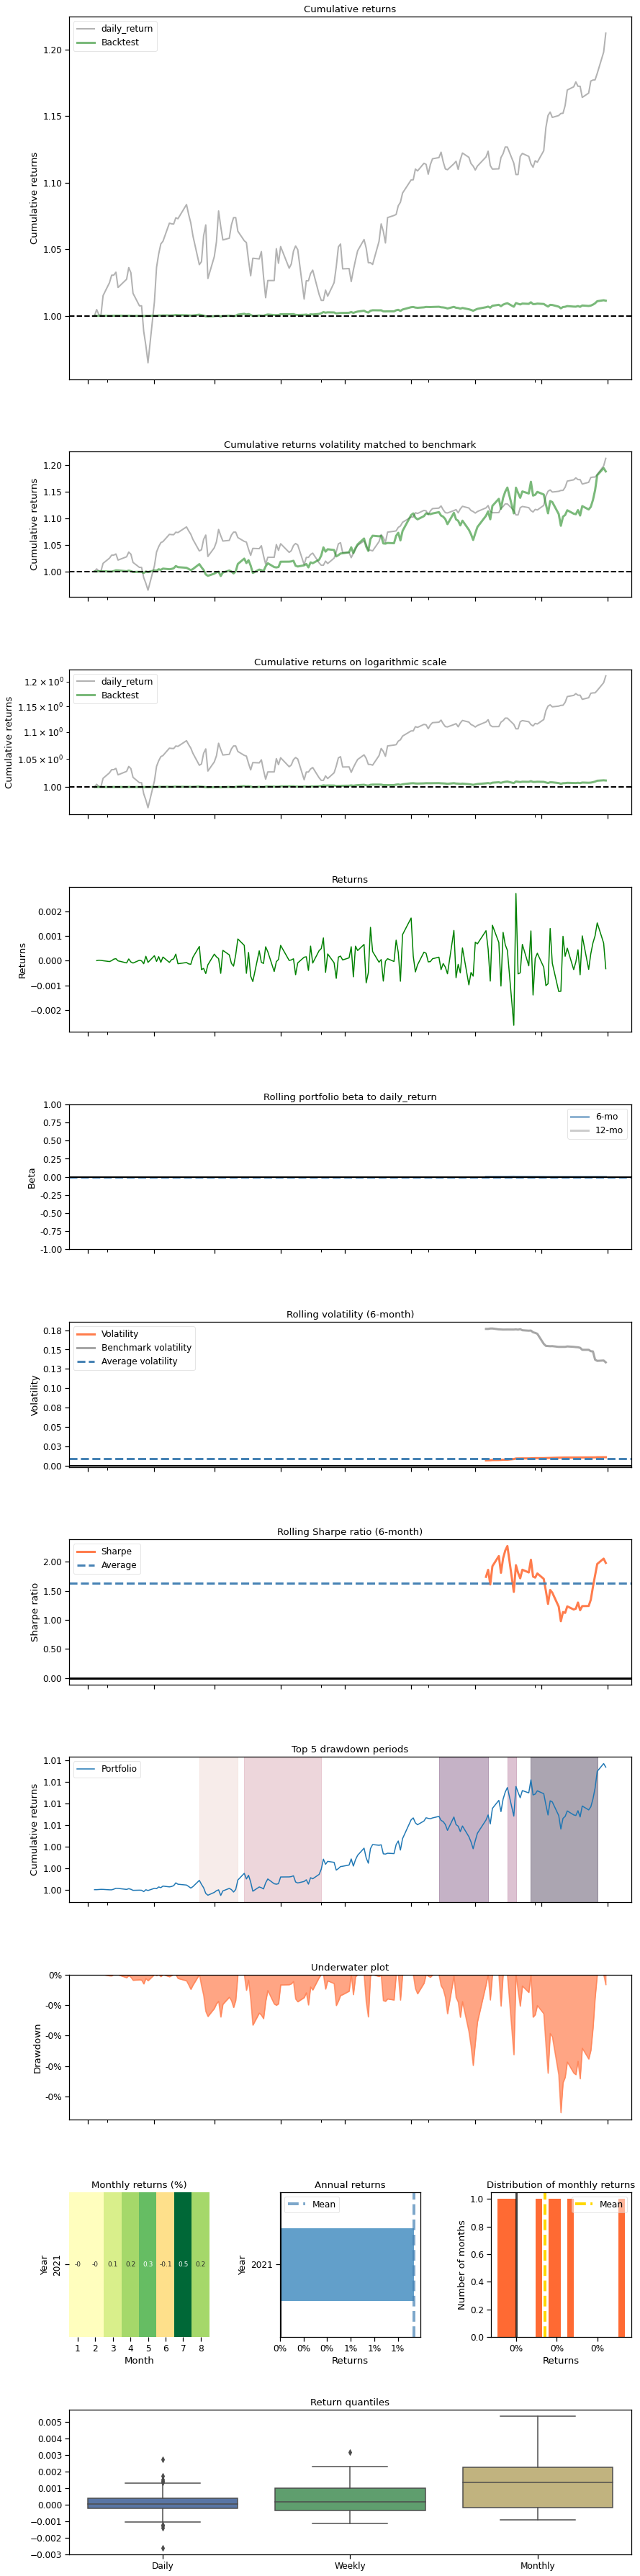

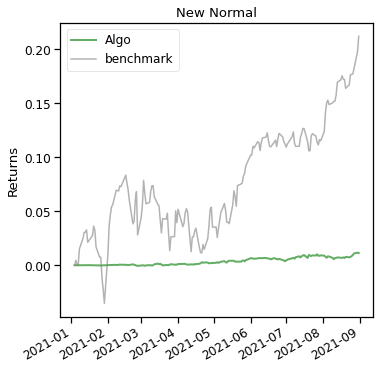

In [34]:
""" BackTest Plot """
# YOUR CODE HERE
%matplotlib inline
backtest_plot(account_value = df_account_value,     # pass the account value memory into the backtest functions
              baseline_ticker = '^NSEI',             # select a baseline ticker Dow Jones Index: ^DJI, S&P 500: ^GSPC, NASDAQ 100: ^NDX
              baseline_start = '2020-01-01', 
              baseline_end =  '2021-09-01')

### DashBoard (2 points)

Dash is a simple open source library. It is the original low-code framework for rapidly building data apps in Python, R, Julia, and F#. It can bind a user interface to Python code in less than 10 minutes.

Dash apps are rendered in the web browser. Since Dash apps are viewed in the web browser, Dash is inherently cross-platform and mobile ready.

Dash is released under the permissive MIT license. Plotly develops Dash and also offers a platform for writing and deploying Dash apps.

Refer to Dash Documentation [here](https://dash.plotly.com/). Mainly refer to Part 2 (Layout) and Part 3 (Basic callbacks) within the Dash tutorial in the given documentation. 

To know more about Dash, refer [here](https://medium.com/plotly/introducing-jupyterdash-811f1f57c02e).



#### Create the dashboard using Dash HTML components

Hint: [Layout](https://dash.plotly.com/layout) , [callbacks](https://dash.plotly.com/basic-callbacks)

* Scatter plot of Stock closing price 
  * Create a dropdown for ticker Symbols
  * Create a plot of stock closing price values that changes upon selecting ticker using drop down
* Bar plot of trade off balance resulted from DRL Agent 
  * Create two dropdowns for selecting start and end dates
  * Create a bar plot showing account value between start and end date as a result to dropdown change.


In [ ]:
#@title Install FinRL, other necessary libraries and extensions
!pip -qq install git+https://github.com/AI4Finance-LLC/FinRL-Library.git

!pip install -q jupyter-dash==0.3.0rc1 dash-bootstrap-components

!pip install pyyaml==5.4.1

!pip install macrodemos --upgrade
!pip install -q dash==2.0.0

In [2]:
from dash import html, dcc
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from jupyter_dash import JupyterDash
from dash.dependencies import Input, Output

""" Build App """
app = JupyterDash(__name__)
df=px.data

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [3]:
# Using plotly.express
import plotly.express as px

df = px.data.stocks()
fig = px.line(df, x='date', y="GOOG")
fig.show()

In [4]:
df.set_index('date',inplace=True)

In [5]:
df.columns

Index(['GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'MSFT'], dtype='object')

In [7]:
html.H1('Relative Returns Comparison'), html.Div([html.H3('Enter a stock symbol:', style={'paddingRight': '30px'}),
		dcc.Dropdown(
			id='my_ticker_symbol',
			options = df.columns,
			value = ['GOOG'], 
			multi = True
			# style={'fontSize': 24, 'width': 75}
			)	])

(H1('Relative Returns Comparison'),
 Div([H3(children='Enter a stock symbol:', style={'paddingRight': '30px'}), Dropdown(id='my_ticker_symbol', multi=True, options=Index(['GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'MSFT'], dtype='object'), value=['GOOG'])]))

In [ ]:
app.layout = html.Div([
    dcc.Tabs(id='dashboard-tabs', value='price-tab',children=[
        dcc.Tab(label='Stock Price', value='price-tab',children=[
            html.Div([html.H2(id='tab1-stock-name',
                           style={'width':'30%','display':'inline-block'}), 
                      html.H4(id='tab1-ticker', 
                           style={'width':'10%','display':'inline-block'})],
                      style={'width':'90%','margin':'auto'})
            # Position 2, Table of stats and graph
            ]), # Tab 1, End price-tab
        dcc.Tab(label='Stock/Index Growth', value='change-tab',children=[
            html.Div([html.H2('Stock Price Growth vs. Index Growth')],
                     style={'width':'90%','margin':'auto',
                            'text-align':'center'})
            # Position 2, Table of stats and graph
            ]) # Tab 2, End change-tab
        ]) # End Tabs
    ]) # End base Div

In [13]:
@app.callback([Output('tab2-table','children'),
               Output('tab2-vis','figure')],
              [Input('tab2-index-choice','value'),
               Input('tab2-stock-include','value'),
               Input('tab2-time-interval','value')])
def generate_tab2_graph(mkt,stocks,time):
    # Function to calculate price change relative to the first day
    def get_price_change(price_list):
        base_price = price_list[0]
        return [(price/base_price)-1 for price in price_list]

    df_stocks = []
    if len(stocks) > 0:
        for stock in stocks:
            if mkt=='hsi':
                stock = stock[1:] + '.HK'
            stock_df = yfinance.Ticker(stock).history(period=time)
            stock_df = stock_df.reset_index()[['Date','Close']]
            stock_df.columns = ['Date',stock]
            df_stocks.append(stock_df)


    y_ticker = None
    index_col = None
    if mkt == 'hsi':
        y_ticker = '^HSI'
        index_col = 'Heng Seng Index'

    elif mkt == 'sp500':
        y_ticker = '^GSPC'
        index_col = 'S&P 500'
    elif mkt == 'nifty500':
        y_ticker = '^NSEI'
        index_col = 'Nifty 50'
    else:
        return html.Table(), {'data': None}

    # Prepare the data set to plot the line chart
    index = yfinance.Ticker(y_ticker)
    df_index = index.history(period=time).reset_index()[['Date','Close']]
    df_index.columns = ['Date', index_col]
    # To take out duplicated columns, ie, Date, while concat
    if len(stocks) > 0:
        for df_temp in df_stocks:
            df_index = pd.merge(df_index, df_temp, how='left',on='Date')
        # In case there are NA's, fill with last observation
        df_index = df_index.fillna(method='backfill', axis=1)
        # Drop duplicated columns in case there are
        df_index = df_index.loc[:,~df_index.columns.duplicated()]

    # Convert from price to percent change relative to Day 1 of the period
    for col in df_index.columns:
        if col != 'Date':
            df_index[col] = get_price_change(df_index[col].tolist())
    fig = getLinePlot(df_index, 2)

    # Prepare the data set to list the summary on the table
    last_close = df_index[index_col].tolist()[-1]*100
    df_index_period = index.history(period=time).reset_index()
    df_index_52weeks = index.history(period='1y').reset_index()
    range_period = (round(df_index_period['Close'].min(),2), 
                    round(df_index_period['Close'].max(),2))
    range_52weeks = (round(df_index_52weeks['Close'].min(),2), 
                     round(df_index_52weeks['Close'].max(),2))
    volume = (index.history(period=time).reset_index()['Volume'].tolist()[-1],
              index.history(period=time).reset_index()['Volume'].mean())
    # Generate a table of summary
    table = getTab2Table(index_col, last_close, range_period, range_52weeks)

    return table, fig

In [ ]:
def verify_ticker(ticker, mkt):
    if mkt == 'hk':
        tick = re.findall('^\d{1,5}$', ticker)
        if len(tick)>0:
            tick = str(tick[0])[::-1]
            while(len(tick)<4):
                tick += '0'
            tick = tick[::-1]
            tick += '.HK'
            return True, tick
        else:
            return False, None
    elif mkt == 'us':
        tick = re.findall('^[A-Za-z]{1,4}$', ticker)
        if len(tick)>0:
            return True, tick[0].upper()
    elif mkt == 'ind':
        tick = re.findall('^[A-Za-z]{1,4}$', ticker)
        if len(tick)>0:
            return True, tick[0].upper()
        else:
            return False, None
    return False, None

In [ ]:
# Obtain 50- ,100- and 200-day moving average
def getMA(stock, time, date_list):
    if 'mo' in time or time=='ytd' or time=='1y':
        df = stock.history(period='2y')
    elif time=='2y' or time=='3y' or time=='4y':
        df = stock.history(period='5y')
    else:
        df = stock.history(period='10y')
    df = df.reset_index()[['Date','Open','Low','High','Close']]
    df['MA50'] = df.Close.rolling(50).mean()
    df['MA100'] = df.Close.rolling(100).mean()
    df['MA200'] = df.Close.rolling(200).mean()

    df = df.loc[(df['Date']>=date_list.min()) & (df['Date']<=date_list.max())]
    return df

In [ ]:
@app.callback([Output('tab2-stock-include','options'),
               Output('tab2-stock-include','value')],
               [Input('tab2-index-choice','value')])
def generate_dropdown_stocknames(mkt):
    if mkt == 'hsi':
        stock_list = pd.read_csv('C:\\Users\\Pranav Jaswal\\Desktop\\StockAnalytics-master\\IndexComponents\\HengSengStockList.csv',
                     dtype=str)
        stock_list = stock_list.sort_values('Ticker')
        stock_list['label'] = stock_list['Ticker'].astype(str) + '\t' + \
                              stock_list['Company']
        opts = [{'label': label, 'value': ticker} for label, ticker in 
                zip(stock_list['label'].tolist(),
                    stock_list['Ticker'].tolist())]
        return opts, []
    elif mkt == 'sp500':
        stock_list = pd.read_csv('C:\\Users\\Pranav Jaswal\Desktop\\StockAnalytics-master\\IndexComponents\\SP500StockList.csv',
                                 engine='python')
        stock_list = stock_list.sort_values('Ticker')
        stock_list['label'] = stock_list['Ticker']
        opts = [{'label': label, 'value': ticker} for label, ticker in 
                zip(stock_list['label'].tolist(),
                    stock_list['Ticker'].tolist())]
        return opts, []
    elif mkt == 'nifty500':
        stock_list = pd.read_csv('C:\\Users\\Pranav Jaswal\\Desktop\\StockAnalytics-master\\IndexComponents\\ind_nifty500list.csv',
                                 engine='python')
        stock_list = stock_list.sort_values('Ticker')
        stock_list['label'] = stock_list['Ticker']
        opts = [{'label': label, 'value': ticker} for label, ticker in 
                zip(stock_list['label'].tolist(),
                    stock_list['Ticker'].tolist())]
        return opts, []
    return [], []

In [30]:
# Generate stock price and graph on Tab 1
@app.callback([Output('tab1-stock-name','children'), # Stock Name
               Output('tab1-ticker','children'), # Ticker
               Output('tab1-stock-price','children'), # Current Stock Price
               Output('tab1-stock-price-change','children'), # Price Change
               Output('tab1-stock-price-change','style'), 
               # Price Change font colour
               Output('tab1-stock-price-percentchange','children'), 
               # Price Percent Change
               Output('tab1-stock-price-percentchange','style'), 
               # Price Precent Change font colour
               Output('tab1-error-message','children'), # Error Message
               Output('tab1-vis','figure'), # Stock Price Chart
               Output('tab1-table','children')], # Table of Stock Stats
              [Input('tab1-submit','n_clicks'), # Button
               Input('tab1-time-interval','value')], # Time interval
              [State('tab1-ticker-input','value'), # Ticker textbox input
               State('tab1-market-dropdown', 'value')]) # Market Dropdown input
def get_ticker(n_clicks, time, ticker, mkt):
    # For default setting
    if ticker == '':
        return 'Please Enter a Stock Ticker', \
               '','','',{'width':'20%', 'display':'inline-block'},'', \
               {'width':'20%', 'display':'inline-block'},'', \
               {'data':None}, None
    # Verify ticker format in respective to stock market
    stockFormat, ticker = verify_ticker(ticker, mkt)
    # Catch incorrect 
    if stockFormat is False:
        return 'Wrong Ticker', '#######', '$##.##', '##.##', \
               {'width':'20%', 'display':'inline-block'}, '##.##%', \
               {'width':'20%', 'display':'inline-block'}, \
               'Error! Please try again.', {'data':None}, None
    # Obtain stock price and stats
    stock = yfinance.Ticker(ticker)
    # Catch if stock exists
    if stock.history(period='ytd').shape[0] == 0:
        return 'Wrong Ticker', '#######', '$##.##', '##.##', \
               {'width':'20%', 'display':'inline-block'}, '##.##%', \
               {'width':'20%', 'display':'inline-block'}, \
               'Error! Please try again.', {'data':None}, None
    ### Stock Stats for Info Box ###
    try: 
        # Name and price
        stock_name = stock.info['longName']
        price_list = stock.history(period=time)['Close'].tolist()
        price = f'${price_list[-1]:.2f}'
        # Price Change
        price_change = price_list[-1] - price_list[-2]
        price_percent_change = (price_list[-1]/price_list[-2])-1
        if price_change > 0:
            price_change_colour = {'color':'green'}
        else:
            price_change_colour = {'color':'red'}
        price_change_colour['display']= 'inline-block'
        price_change_colour['width']= '20%'
        price_change_colour['font-size'] = '150%'
        price_change = f'{price_change:.2f}'
        price_percent_change = f'{price_percent_change*100:,.2f}%'

        df = getMA(stock, time, 
                   stock.history(period=time).reset_index()['Date'])

        fig = getCandlestick(df)
        table = getTab1Table(stock.history(period=time).reset_index(),
                             stock.info)

    except:
        return 'Sorry! Company Not Available', '#######', '$##.##', '##.##', \
               {'width':'20%', 'display':'inline-block'}, '##.##%', \
               {'width':'20%', 'display':'inline-block'}, \
               'Error! Please try again another Company.', {'data':None}, None


    return stock_name, ticker, price, price_change, price_change_colour, \
           price_percent_change, price_change_colour, '', fig, table

NameError: ignored

In [51]:
# Base Layout
app.layout = html.Div([
	dcc.Tabs(id='dashboard-tabs', value='price-tab',children=[
		dcc.Tab(label='Stock Price', value='price-tab',children=[
			html.Div([html.H2(id='tab1-stock-name',
				           style={'width':'30%','display':'inline-block'}), 
				      html.H4(id='tab1-ticker', 
				           style={'width':'10%','display':'inline-block'})],
				      style={'width':'90%','margin':'auto'}),
			# Position 1, Info and dropdown
			html.Div(get_stats_graph_layout('tab1'),
				     style={'width':'90%','margin':'auto'})
			# Position 2, Table of stats and graph
			]), # Tab 1, End price-tab
		dcc.Tab(label='Stock/Index Growth', value='change-tab',children=[
			html.Div([html.H2('Stock Price Growth vs. Index Growth')],
				     style={'width':'90%','margin':'auto',
				            'text-align':'center'}),
			# Position 0, Title
			html.Div(get_tab2_info_box(),
				     style={'width':'90%','margin':'auto'}),
			# Position 1, Info and dropdown
			html.Div(get_stats_graph_layout('tab2'),
				     style={'width':'90%','margin':'auto'})
			# Position 2, Table of stats and graph
			]) # Tab 2, End change-tab
		]) # End Tabs
	]) # End base Div


NameError: ignored

In [47]:
### Helper Function for Tab 1 Callbacks ###
"""
Verify ticker, return (Valid Ticker is True, Ticker).
This function only verify the format, it does not verify existence.
"""
def verify_ticker(ticker, mkt):
	# Identify which ticker is that
	# For Hong Kong Stocks
	if mkt == 'hk':
		tick = re.findall('^\d{1,5}$', ticker)
		if len(tick)>0:
			tick = str(tick[0])[::-1]
			while(len(tick)<4):
				tick += '0'
			tick = tick[::-1]
			tick += '.HK'
			return True, tick
		# If entered ticker invalid
		else:
			return False, None
	#
	elif mkt == 'us':
		tick = re.findall('^[A-Za-z]{1,4}$', ticker)
		if len(tick)>0:
			return True, tick[0].upper()
		# If entered ticker invalid
		else:
			return False, None
	return False, None

In [32]:
from dash.dependencies import Input, Output, State
##### Callbacks for Tab 1 ######
# Generate stock price and graph on Tab 1
@app.callback([Output('tab1-stock-name','children'), # Stock Name
	           Output('tab1-ticker','children'), # Ticker
	           Output('tab1-stock-price','children'), # Current Stock Price
	           Output('tab1-stock-price-change','children'), # Price Change
	           Output('tab1-stock-price-change','style'), 
	           # Price Change font colour
	           Output('tab1-stock-price-percentchange','children'), 
	           # Price Percent Change
	           Output('tab1-stock-price-percentchange','style'), 
	           # Price Precent Change font colour
	           Output('tab1-error-message','children'), # Error Message
	           Output('tab1-vis','figure'), # Stock Price Chart
	           Output('tab1-table','children')], # Table of Stock Stats
	          [Input('tab1-submit','n_clicks'), # Button
	           Input('tab1-time-interval','value')], # Time interval
	          [State('tab1-ticker-input','value'), # Ticker textbox input
	           State('tab1-market-dropdown', 'value')]) # Market Dropdown input
# Obtain 50- ,100- and 200-day moving average
def getMA(stock, time, date_list):
	if 'mo' in time or time=='ytd' or time=='1y':
		df = stock.history(period='2y')
	elif time=='2y' or time=='3y' or time=='4y':
		df = stock.history(period='5y')
	else:
		df = stock.history(period='10y')
	df = df.reset_index()[['Date','Open','Low','High','Close']]
	df['MA50'] = df.Close.rolling(50).mean()
	df['MA100'] = df.Close.rolling(100).mean()
	df['MA200'] = df.Close.rolling(200).mean()

	df = df.loc[(df['Date']>=date_list.min()) & (df['Date']<=date_list.max())]
	return df

In [33]:
def get_ticker(n_clicks, time, ticker, mkt):
	# For default setting
	if ticker == '':
		return 'Please Enter a Stock Ticker', \
		       '','','',{'width':'20%', 'display':'inline-block'},'', \
		       {'width':'20%', 'display':'inline-block'},'', \
		       {'data':None}, None
	# Verify ticker format in respective to stock market
	stockFormat, ticker = verify_ticker(ticker, mkt)
	# Catch incorrect 
	if stockFormat is False:
		return 'Wrong Ticker', '#######', '$##.##', '##.##', \
		       {'width':'20%', 'display':'inline-block'}, '##.##%', \
		       {'width':'20%', 'display':'inline-block'}, \
		       'Error! Please try again.', {'data':None}, None
	# Obtain stock price and stats
	stock = yfinance.Ticker(ticker)
	# Catch if stock exists
	if stock.history(period='ytd').shape[0] == 0:
		return 'Wrong Ticker', '#######', '$##.##', '##.##', \
		       {'width':'20%', 'display':'inline-block'}, '##.##%', \
		       {'width':'20%', 'display':'inline-block'}, \
		       'Error! Please try again.', {'data':None}, None
	### Stock Stats for Info Box ###
	try: 
		# Name and price
		stock_name = stock.info['longName']
		price_list = stock.history(period=time)['Close'].tolist()
		price = f'${price_list[-1]:.2f}'
		# Price Change
		price_change = price_list[-1] - price_list[-2]
		price_percent_change = (price_list[-1]/price_list[-2])-1
		if price_change > 0:
			price_change_colour = {'color':'green'}
		else:
			price_change_colour = {'color':'red'}
		price_change_colour['display']= 'inline-block'
		price_change_colour['width']= '20%'
		price_change_colour['font-size'] = '150%'
		price_change = f'{price_change:.2f}'
		price_percent_change = f'{price_percent_change*100:,.2f}%'

		df = getMA(stock, time, 
			       stock.history(period=time).reset_index()['Date'])

		fig = getCandlestick(df)
		table = getTab1Table(stock.history(period=time).reset_index(),
			                 stock.info)

	except:
		return 'Sorry! Company Not Available', '#######', '$##.##', '##.##', \
		       {'width':'20%', 'display':'inline-block'}, '##.##%', \
		       {'width':'20%', 'display':'inline-block'}, \
		       'Error! Please try again another Company.', {'data':None}, None


	return stock_name, ticker, price, price_change, price_change_colour, \
	       price_percent_change, price_change_colour, '', fig, table

In [34]:
##### Callbacks for Tab 2 ######
"""
To generate the options to display on second dropdown for users to include
stock(s) addition to index.
Tab 2 only relies on data from Yahoo Finance
"""
"""
This callback return the list of stocks of corresponsed market. It requires
user to input which market to look and return 2 outputs.
1- List of stocks in the multi-dropdown list
2- The default value of the multi-dropdown list, in order to unselect previous
   stocks.
"""
@app.callback([Output('tab2-stock-include','options'),
	           Output('tab2-stock-include','value')],
	           [Input('tab2-index-choice','value')])
def generate_dropdown_stocknames(mkt):
	if mkt == 'hsi':
		stock_list = pd.read_csv('../IndexComponents/HengSengStockList.csv',
		             dtype=str)
		stock_list = stock_list.sort_values('Ticker')
		stock_list['label'] = stock_list['Ticker'].astype(str) + '\t' + \
		                      stock_list['Company']
		opts = [{'label': label, 'value': ticker} for label, ticker in 
		        zip(stock_list['label'].tolist(),
		        	stock_list['Ticker'].tolist())]
		return opts, []
	elif mkt == 'sp500':
		stock_list = pd.read_csv('../IndexComponents/SP500StockList.csv',
			                     engine='python')
		stock_list = stock_list.sort_values('Ticker')
		stock_list['label'] = stock_list['Ticker']
		opts = [{'label': label, 'value': ticker} for label, ticker in 
		        zip(stock_list['label'].tolist(),
		        	stock_list['Ticker'].tolist())]
		return opts, []
	return [], []

In [1]:
df = px.data.stocks() #reading stock price dataset 
def stock_prices():
    # Function for creating line chart showing Google stock prices over time 
    fig = go.Figure([go.Scatter(x = df['date'], y = df['GOOG'],\
                     line = dict(color = 'firebrick', width = 4), name = 'Google')
                     ])
    fig.update_layout(title = 'Prices over time',
                      xaxis_title = 'Dates',
                      yaxis_title = 'Prices'
                      )
    return fig  

 
app.layout = html.Div(id = 'parent', children = [
    html.H1(id = 'H1', children = 'Styling using html components', style = {'textAlign':'center',\
                                            'marginTop':40,'marginBottom':40}),

        
        dcc.Graph(id = 'line_plot', figure = stock_prices())    
    ]
                     )

NameError: ignored

In [6]:
dcc.Dropdown( id = 'dropdown',
options = [
    {'label':'Google', 'value':'GOOG' },
    {'label': 'Apple', 'value':'AAPL'},
    {'label': 'Amazon', 'value':'AMZN'},
    ],
value = 'GOOGL'       
)

Dropdown(id='dropdown', options=[{'label': 'Google', 'value': 'GOOG'}, {'label': 'Apple', 'value': 'AAPL'}, {'label': 'Amazon', 'value': 'AMZN'}], value='GOOGL')

In [7]:
@app.callback(Output(component_id='line_plot', component_property= 'figure'),
              [Input(component_id='dropdown', component_property= 'value')])
def graph_update(dropdown_value):
    print(dropdown_value)
    fig = go.Figure([go.Scatter(x = df['date'], y = df['{}'.format(dropdown_value)],\
                     line = dict(color = 'firebrick', width = 4))
                     ])
    
    fig.update_layout(title = 'Stock prices over time',
                      xaxis_title = 'Dates',
                      yaxis_title = 'Prices'
                      )
    return fig  

In [9]:
# Run app and display result on external broswer
app.run_server(debug=True,port=9052)

OSError: ignored

In [11]:
!ps -ef | grep 8052

root         666     519  0 11:22 ?        00:00:00 /bin/bash -c ps -ef | grep 8052
root         668     666  0 11:22 ?        00:00:00 grep 8052


### Report Analysis

* Discuss on the parameters used to increase the reward
* Report the safest stocks to trade without much loss
* Comment on the Dashboard application and user interface
